
## MED 3

# Regresja wielomianowa

Wczytanie niezbędnych bibliotek


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Wprowadzenie teoretyczne

Celem regresji wielomianowej jest dopasowanie do danych doświadczalnych/historycznych wykresu funkcji, która oddaje charakter tych danych. 

Zadanie polega na znalezieniu wielomianu $\hat{f}(x)$ postaci:

$$\hat{f}(x)=w_0+w_1 x^1+w_2x^2+ … +w_n x^n,$$

gdzie $x \in R$, a $w∈R^N$ jest wektorem zawierającym współczynniki wielomianu. 

To właśnie na znalezieniu wektora $w$ będziemy skupiać uwagę.

Mając dane historyczne  $X={x_1,x_2,…,x_k}$ oraz odpowiadające im wartości $Y={y_1,y_2,…,y_k}$ będziemy poszukiwać najlepiej dopasowanego wektora $w$. Co to dla nas znaczy?

W efekcie musimy znaleźć takie parametry modelu (wielomianu), które zminimalizują nam sumę kwadratów błędu (RSE). 

Czyli takiego, dla którego wartości zwracane przez funkcję $\hat{f}$ i odpowiadające im wartości rzeczywiste najmniej się różnią. 
Załóżmy, że mamy już wybrany wektor np. $w=[1,0.5,0,0,2,0.3,…,1]$ 
możemy obliczyć:

$$\hat{f}(x_1)=w_0 + w_1x_1^1+w_2x_1^2+...+w_nx_1^n$$

$$\hat{f}(x_2)=w_0 + w_1x_2^1+w_2x_2^2+...+w_nx_2^n$$

$$\vdots$$

$$\hat{f}(x_k)=w_0 + w_1x_k^1+w_2x_k^2+...+w_nx_k^n$$

Błąd dopasowania możemy wyliczyć poprzez porównanie wartości otrzymanej dla danego argumentu $\hat{f}(x_i)$ z wartością rzeczywistą $y_i$ odpowiadającą temu argumentowi, stąd mamy

$$e^1=\hat{f}(x_1)−y_1$$
$$e^2=\hat{f}(x_2)−y_2$$
$$\vdots$$
$$e^k=\hat{f}(x_k)−y_k$$


Następnie sumując kwadraty błędów $e^1, … , e^k$ otrzymujemy wartość błędów dla danych parametrów modelu:

$$E(w)=\sum_{i=1}^k\left(\hat{f}(x_i)−y_i\right)^2$$

Chcemy aby suma kwadratów błędów była jak najmniejsza dla danego stopnia wielomianu, a to co możemy zmieniać to wartości współczynników wektora $w$. 

Powyższe analizy możmy zapisać w postaci macierzowej.
$$ X  w = Y ,$$ gdzie

$$X = \left|\begin{array}{cccc}
1&x_1&...&x_1^n\\
1&x_2&...&x_2^n\\
\vdots&\vdots&\vdots&\vdots\\
1&x_k&...&x_k^n\end{array}\right|, $$

$$w = \left|\begin{array}{c}
w_0\\
w_1\\
...\\
w_n\end{array}\right|, $$


$$Y = \left|\begin{array}{c}
y_0\\
y_1\\
...\\
y_k\end{array}\right|. $$

Ponieważ w ogólnym przypadku macierz $X$ jest macierzą prostokątną, więc nie można jej odwrócić (nie da się wyzerować błędu aproksymacji), za to możemy znaleźć rozwiązanie przybliżone (takie, które minimalizuje nasz błąd):

$$\min_w||Xw−Y||_2^2$$

Rozwiązaniem, które jest w stanie zminimalizować nam sumę kwadratów błędu jest równanie:

$$ w=X^+Y,$$ 

gdzie $X^+$ jest pseudoodwrotnością macierzy $X$.

# 2. Od korelacji do prostej regresji liniowej

Miara korelacji (Pearsona) pozwala na stwierdzenie stopnia zależności liniowej atrybutów (cech). Dla przypomnienia - zbiór `iris`

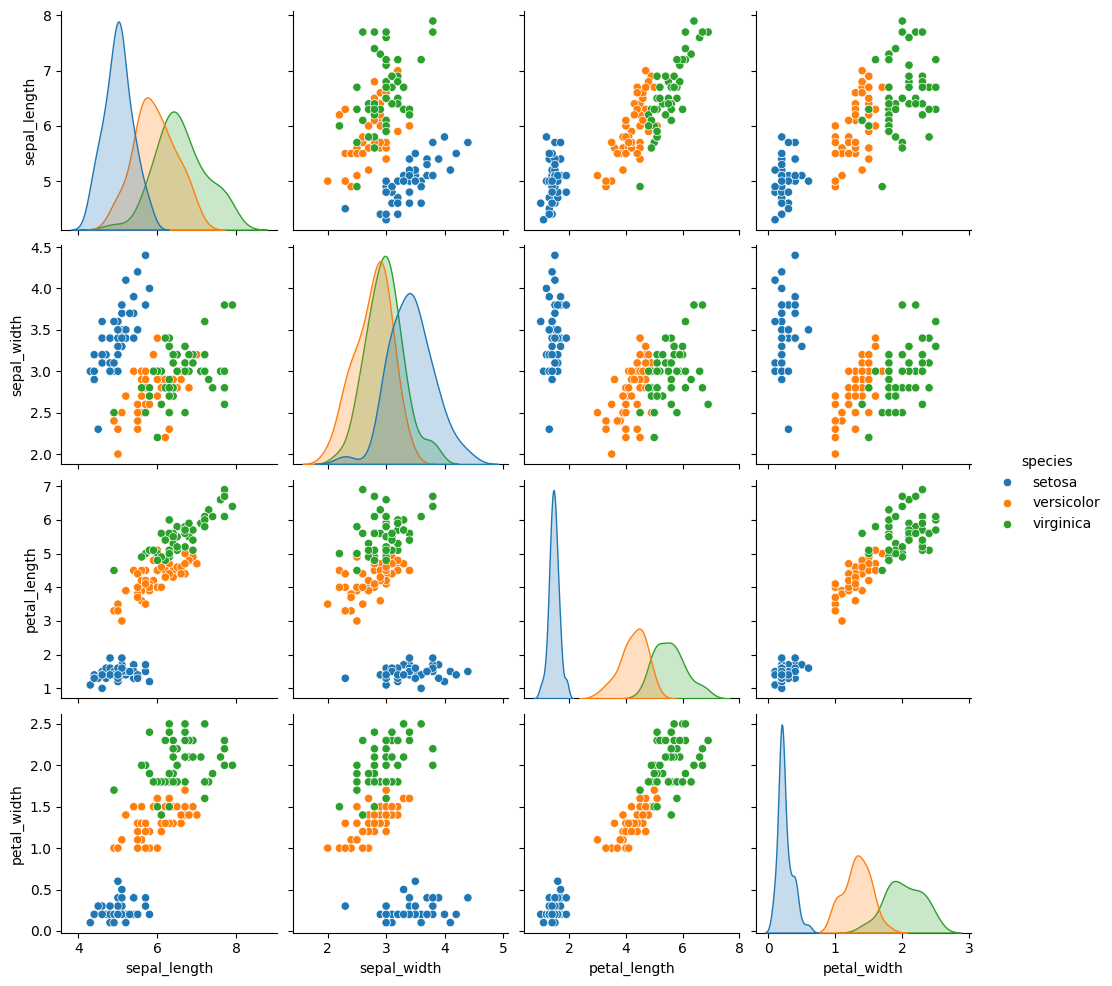

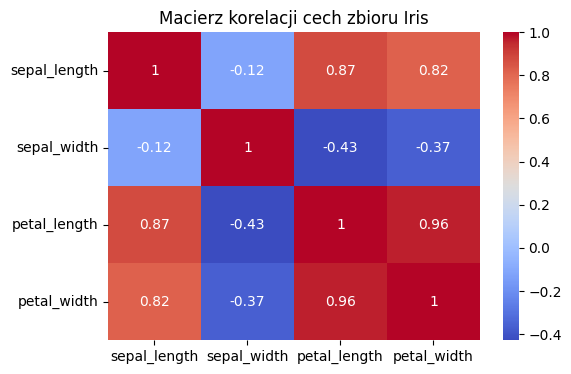

In [3]:
from seaborn import load_dataset

iris = load_dataset("iris")
iris.head()
sns.pairplot(iris, kind="scatter", hue="species")
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(iris.select_dtypes(include=["float", "int"]).corr(), annot=True, cmap="coolwarm")
plt.title("Macierz korelacji cech zbioru Iris")
plt.show()


> **Zadanie** Wskaż atrybuty najbardziej i najmniej skorelowane

Najbardziej skorelowane atrybuty to petal_length i petal_width (0.96),

a najmniej skorelowane to petal_length i sepal_width (-0.43).

Miara korelacji Pearsona odpowiada na pytanie *$czy$* (w jakim stopniu) dane atrybuty ($x,y$) są od siebie zależne liniowo. Odpowiedzi na pytanie *$jak$* od siebie zależą, udzieli model regresyjny. W tym przypadku będzie badany najprostszy model regresji wielomianowej tj. prosta regresja liniowa. Jej wynikiem jest linia prosta $$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$ która pozwala na oszacowanie wartości atrybutu $y$ na podstawie atrybutu $x$. 

Przykład - tworzenie modelu regresyjnego zależności czwartego atrybutu (petal width) od pierwszego (sepal length). Metoda `iloc` umożliwia odwołanie do elementów ramki danych przez ich indeksy, `values` konwertuje wynikową ramkę danych na postać wektora, `reshape` zamienia wektor na macierz o jednej kolumnie. `T` oznacza transpozycję, dzięki której łatwiej zmieścić wydruk w oknie.

In [4]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
print(x.T)
print(y.T)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]]
[[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
  1.2 1.4 1

Tworzenie modelu regresyjnego.

In [5]:
regressor = LinearRegression()  
regressor.fit(x,y) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept) oraz $w_1$ (slope). W naszym modelu są one równe odpowiednio

In [6]:
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)

[-3.200215]
[[0.75291757]]


Znając funkcję $\hat{f}(x)$ modelu liniowego możemy dla wektora $x$ wyznaczyć przewidywane wartości $y$, które dla odróżnienia od rzeczywistych zostaną umieszczone w innym wektorze ($y_{pred}$).

In [7]:
y_pred = regressor.predict(x)
y_pred.T

array([[0.63966461, 0.48908109, 0.33849758, 0.26320582, 0.56437285,
        0.86553988, 0.26320582, 0.56437285, 0.11262231, 0.48908109,
        0.86553988, 0.41378933, 0.41378933, 0.03733055, 1.16670691,
        1.09141515, 0.86553988, 0.63966461, 1.09141515, 0.63966461,
        0.86553988, 0.63966461, 0.26320582, 0.63966461, 0.41378933,
        0.56437285, 0.56437285, 0.71495636, 0.71495636, 0.33849758,
        0.41378933, 0.86553988, 0.71495636, 0.94083163, 0.48908109,
        0.56437285, 0.94083163, 0.48908109, 0.11262231, 0.63966461,
        0.56437285, 0.18791406, 0.11262231, 0.56437285, 0.63966461,
        0.41378933, 0.63966461, 0.26320582, 0.79024812, 0.56437285,
        2.07020799, 1.61845745, 1.99491623, 0.94083163, 1.6937492 ,
        1.09141515, 1.54316569, 0.48908109, 1.76904096, 0.71495636,
        0.56437285, 1.24199866, 1.31729042, 1.39258218, 1.01612339,
        1.84433272, 1.01612339, 1.16670691, 1.46787393, 1.01612339,
        1.24199866, 1.39258218, 1.54316569, 1.39

Wizualizacja danych i prostej regresji.

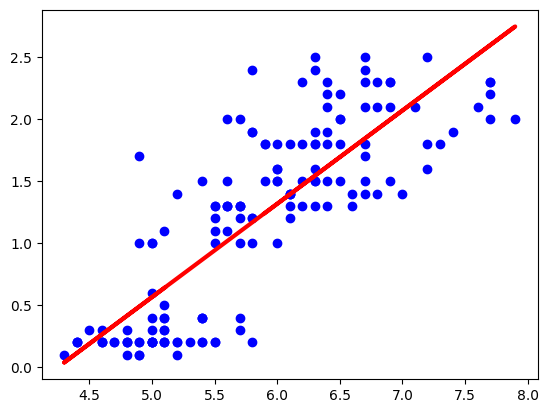

In [8]:
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Jakość modelu możemy ocenić wykorzystując np. bład średniokwadratowy: 

In [9]:
e = metrics.mean_squared_error(y, y_pred)
e

0.19101500769427357

> **Zadanie** Napisz funkcję, która zwróci parametry $w_0$ oraz $w_1$ modelu prostej regresji liniowej oraz $e$ wartość błędu średniokwadratowego dopasowania. Argumentem będzie ramka danych oraz numery dwóch atrybutów.

In [10]:
def regresja_liniowa(df, x_col, y_col):
    x = df[[x_col]].values if isinstance(x_col, str) else df.iloc[:, [x_col]].values
    y = df[[y_col]].values if isinstance(y_col, str) else df.iloc[:, [y_col]].values
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    return model.intercept_[0], model.coef_[0][0], metrics.mean_squared_error(y, y_pred)

w0, w1, e = regresja_liniowa(iris, 'sepal_length', 'petal_length')
print("w0 =", w0, "w1 =", w1, "MSE =", e)

w0 = -7.101443369602455 w1 = 1.8584329782548412 MSE = 0.7430610341321241


> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par błąd dopasowania (obciążenie / bias) modelu jest największa, a dla których - najmniejsza. Czy można zauważyć zależność tej miary od miary korelacji ?

In [11]:
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for i in range(len(cols)):
    for j in range(len(cols)):
        if i != j:
            w0, w1, e = regresja_liniowa(iris, i, j)
            print(f"{cols[i]} → {cols[j]} | MSE = {e:.4f}")

sepal_length → sepal_width | MSE = 0.1861
sepal_length → petal_length | MSE = 0.7431
sepal_length → petal_width | MSE = 0.1910
sepal_width → sepal_length | MSE = 0.6717
sepal_width → petal_length | MSE = 2.5273
sepal_width → petal_width | MSE = 0.4998
petal_length → sepal_length | MSE = 0.1635
petal_length → sepal_width | MSE = 0.1541
petal_length → petal_width | MSE = 0.0421
petal_width → sepal_length | MSE = 0.2254
petal_width → sepal_width | MSE = 0.1634
petal_width → petal_length | MSE = 0.2256


Największy błąd dopasowania występuje dla pary sepal_width → petal_length, a najmniejszy dla petal_length → petal_width. Zależność jest zgodna z korelacjami: im wyższa korelacja między zmiennymi, tym niższy błąd regresji liniowej, a przy słabej korelacji MSE jest większe.


# 3. Błąd uczenia i generalizacji

Sprawdzenie skuteczności modelu regresyjnego wymaga wcześniejszego podziału referencyjnego zbioru danych na (w najprostszym przypadku) dwa podzbiory: uczący i testowy. Pierwszy jest wykorzystywany do wyznaczeniu parametrów modelu regresyjnego, drugi - do testowania modelu. Błąd predykcji dla zbioru uczącego to błąd uczenia, określający stopień dopasowania modelu do znanych danych. Błąd predykcji dla zbioru testowego pokazuje przydatność modelu do przewidywania dla danych, które nie zostały wykorzystane w procesie uczenia. Pokazuje on na ile model jest ogólny tzn. sprawdza się dla dowolnych danych i dlatego jest nazywany błędem generalizacji.

Zbiór `dane10` zawiera dane charakteryzujące się dwoma atrybutami opisującymi (cechami) należące do trzech klas. Każda klasa definiuje jeden podzbiór danych. Podzbiory te wykorzystamy do badania modeli regresyjnych.

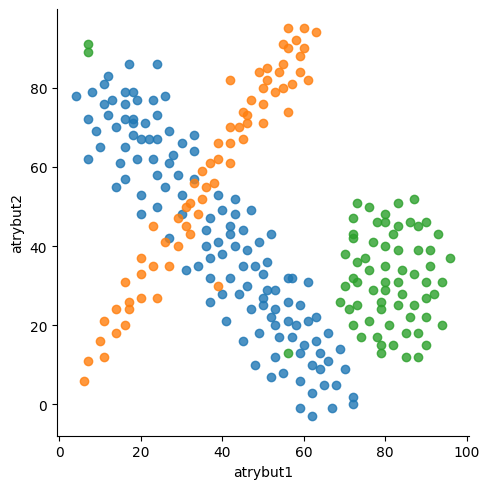

In [12]:
d = pd.read_csv('dane10.csv')
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=False)

Wybieramy podzbiór `klasa 3` i generujemy modeli liniowy.

In [13]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

[[61 66 69 72 62 62 59 55 52 48 45 37 40 41 34 37 31 27 20 14  7  4 17 26
  33 43 47 52 57 63 70 72 67 59 53 59 56 49 51 49 47 46 45 43 40 36 37 33
  30 24 30 36 39 33 18 24 30 27 23 16  7 10 20  9 15 24 12 16 19 24 29 26
  21 18 20 16 16 11 11  8 12 14 18 13 18 16 19 23 22 28 27 24 68 64 64 66
  65 63 59 62 61 58 60 57 56 56 51 53 53 50 48 45 43 42 42 40 39 37 42 44
  46 50 50 52 53 54]]
[[31 18 14  2 -3  3 -1  8  7 10 16 32 28 21 35 26 34 42 48 55 62 78 86 78
  68 52 49 43 32 22  9  0 -1  6 12 25 32 18 36 41 24 39 44 48 49 40 47 64
  53 50 48 44 53 57 79 73 66 69 77 57 72 65 53 69 61 86 83 79 77 67 58 55
  71 68 67 72 76 76 81 79 73 70 71 77 72 65 62 62 67 63 61 58  5  9 13 11
   5 16 13 10 21 20 15 17 21 26 29 24 29 33 35 35 40 45 43 38 41 37 32 28
  30 27 25 22 20 17]]


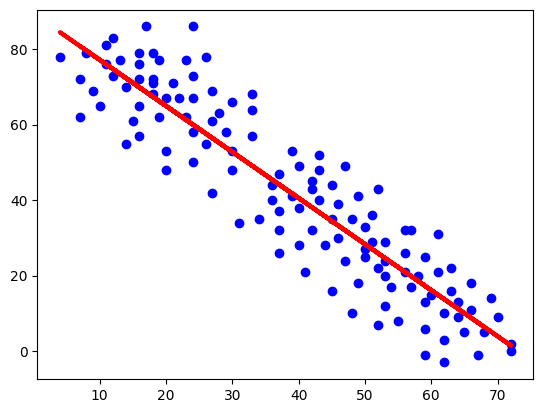

In [14]:
%matplotlib inline
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()


> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

[[56  7  7 84 80 79 82 80 73 70 70 72 73 76 80 83 87 90 93 96 94 92 94 90
  88 85 82 79 79 78 74 72 71 69 72 72 72 77 78 80 83 86 88 88 91 91 87 84
  83 80 80 83 90 90 90 88 85 86 87 83 79 77 76 75 73 73 76 81]]
[[13 91 89 28 29 24 43 40 36 30 38 47 51 50 48 51 52 46 43 37 31 28 20 15
  12 12 15 13 15 17 17 20 24 26 32 42 43 41 46 46 45 46 45 39 39 35 33 34
  39 35 31 31 31 27 22 18 18 22 25 25 26 29 34 37 31 25 21 20]]


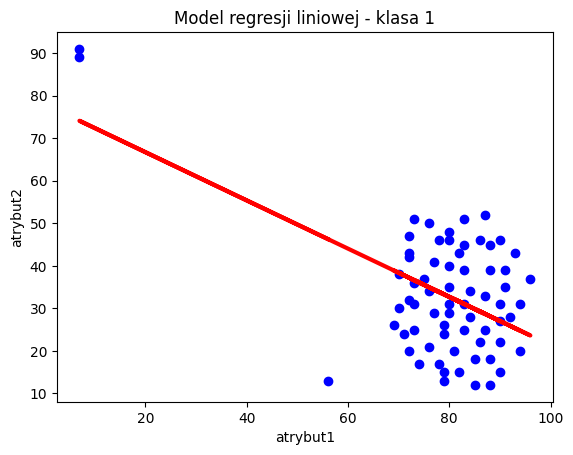

In [15]:
dd = d[d.klasa == 'klasa 1']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.title("Model regresji liniowej - klasa 1")
plt.xlabel("atrybut1")
plt.ylabel("atrybut2")
plt.show()

Model regresji liniowej (czerwona linia) słabo pasuje do danych Klasy 1. Jego silnie ujemne nachylenie jest przede wszystkim efektem dwóch skrajnych obserwacji odstających (outlierów) w lewym górnym rogu, które zniekształcają linię. Główne skupisko punktów w prawym dolnym rogu nie wykazuje wyraźnej zależności liniowej.

W rezultacie, model jest nieadekwatny do opisu relacji między atrybutami dla większości danych w tej klasie, a bardziej trafne mogłoby być rozważenie usunięcia outlierów lub zastosowanie modelu nieliniowego.

[[61 39 42 56 23 58 56 60 63 60 49 51 55 56 59 59 57 55 55 54 51 50 53 50
  50 46 46 47 45 42 44 45 42 42 39 37 39 35 38 35 36 33 31 32 34 32 29 29
  31 27 23 26 20 20 24 20 17 16 14 17 16 11 14 10 11  7  6]]
[[82 30 82 74 45 92 95 95 94 90 84 85 91 90 88 84 81 80 86 84 82 80 79 76
  71 71 73 77 74 70 70 67 61 66 66 61 62 59 56 52 55 56 50 51 48 43 40 47
  45 35 35 41 37 33 27 27 26 31 24 24 20 21 18 16 12 11  6]]


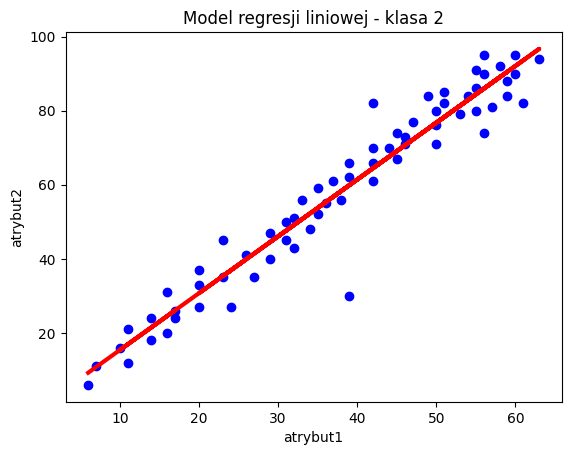

In [16]:
dd = d[d.klasa == 'klasa 2']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.title("Model regresji liniowej - klasa 2")
plt.xlabel("atrybut1")
plt.ylabel("atrybut2")
plt.show()

W Klasie 2 istnieje bardzo silna i wyraźna zależność liniowa między atrybutami. Punkty danych (niebieskie kółka) są ściśle skupione wokół linii regresji (czerwonej), która ma dodatnie nachylenie.

Oznacza to, że:

Wzrost wartości atrybutu 1 prowadzi do niemal proporcjonalnego wzrostu wartości atrybutu 2.

Model regresji liniowej jest bardzo dobrze dopasowany i stanowi adekwatny opis zależności w tej klasie.

Korelacja między atrybutami jest wysoka i dodatnia, a błąd dopasowania jest minimalny.

Badanie modeli regresyjnych z podziałem na zbiór uczący i testowy

In [17]:
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

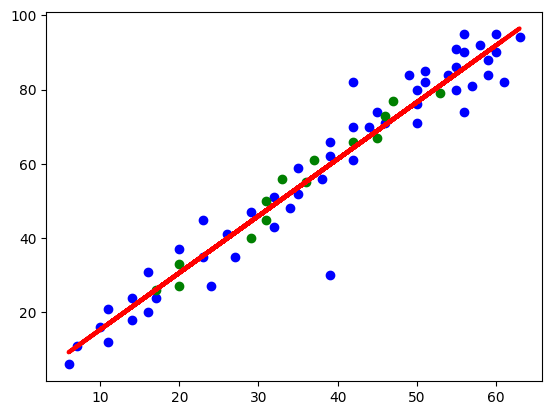

błąd uczenia 48.45425790798868
błąd generalizacji 10.180715401260013


In [18]:
regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)

> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na uczący i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów. Dla których klas uzyskane modele są bardziej, a dla których - mniej stabilne? Dlaczego?

In [19]:
for klasa in ['klasa 1', 'klasa 2', 'klasa 3']:
    dd = d[d.klasa == klasa]
    x, y = dd.iloc[:, 0].values.reshape(-1, 1), dd.iloc[:, 1].values.reshape(-1, 1)
    
    e_train, e_test = [], []
    
    for i in range(10):
        x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=i)
        model = LinearRegression().fit(x_tr, y_tr)
        e_train.append(metrics.mean_squared_error(y_tr, model.predict(x_tr)))
        e_test.append(metrics.mean_squared_error(y_te, model.predict(x_te)))
    
    print(f"{klasa}:")
    print(f"  Średni błąd uczenia = {np.mean(e_train):.2f} ± {np.std(e_train):.2f}")
    print(f"  Średni błąd generalizacji = {np.mean(e_test):.2f} ± {np.std(e_test):.2f}\n")

klasa 1:
  Średni błąd uczenia = 145.69 ± 10.13
  Średni błąd generalizacji = 181.31 ± 39.55

klasa 2:
  Średni błąd uczenia = 39.68 ± 7.20
  Średni błąd generalizacji = 45.21 ± 28.09

klasa 3:
  Średni błąd uczenia = 98.93 ± 8.54
  Średni błąd generalizacji = 107.62 ± 34.21



Modele dla klasy 2 są najbardziej stabilne – zarówno średni błąd uczenia, jak i generalizacji są niskie, a odchylenia standardowe najmniejsze. Natomiast modele dla klasy 1 są najmniej stabilne – szczególnie błąd generalizacji jest duży i wykazuje dużą zmienność. Stabilność zależy od rozrzutu danych i liczby obserwacji w klasie: im mniej zmienności w danych, tym modele są bardziej powtarzalne i przewidywalne dla różnych podziałów zbioru.

# 4. Estymacja parametrów regresji wielomianowej

W przypadku regresji liniowej linia trendu jest linią prostą - jest to szczególny, najprostszy przypadek. W przypadku ogólnym jest to krzywa opisana wielomianem. Współczynniki tego wielomianu mogą być wyznaczane z wykorzystaniem pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji lub poprzez metody iteracyjnej optymalizacji. Zostało to opisane we wprowadzeniu. Celem tej części laboratorium będzie napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych interaktywnie z wykresu. Aproksymatorem będzie w tym przypadku model regresji wielomianowej.  

> **Zadanie** Przy pomocy poniższego kodu wskaż 20 punktów klikając na wykresie tak, by układały się w linię trendu. W efekcie wykonanie poniższego kodu i zebrania punktów otrzymamy ramkę danych z kolumnami x i y. 

In [3]:
import matplotlib
matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ile_probek = 20
xx, yy = [], []

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([0, 6, 0, 20])
ax.set_title("Kliknij 20 punktów na wykresie")

def onclick(event):
    ix, iy = event.xdata, event.ydata
    if ix is None or iy is None:
        return
    ax.plot(ix, iy, 'ro') 
    xx.append(ix)
    yy.append(iy)
    if len(xx) == ile_probek:
        fig.canvas.mpl_disconnect(cid) 
        global df
        df = pd.DataFrame({'x': xx, 'y': yy})
        print("Zebrane punkty:")
        print(df)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()


Zebrane punkty:
           x          y
0   0.861290  10.735931
1   1.074194  12.380952
2   1.403226  14.632035
3   1.848387  16.753247
4   2.235484  17.316017
5   2.758065  15.714286
6   3.000000  13.766234
7   3.077419  12.424242
8   3.212903  10.086580
9   3.290323   7.922078
10  3.464516   4.588745
11  3.774194   3.073593
12  4.306452   2.597403
13  4.625806   3.593074
14  4.964516   5.194805
15  5.245161   7.229437
16  5.419355   9.134199
17  5.554839  10.779221
18  5.719355  10.649351
19  5.729032  12.034632


W efekcie udało się pozyskać następującą macierz (ramkę) danych:

In [4]:
print(df.info())
df.head(ile_probek)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 452.0 bytes
None


,x,y
0,0.861290,10.735931
1,1.074194,12.380952
2,1.403226,14.632035
3,1.848387,16.753247
4,2.235484,17.316017
5,2.758065,15.714286
6,3.000000,13.766234
7,3.077419,12.424242
8,3.212903,10.086580
9,3.290323,7.922078


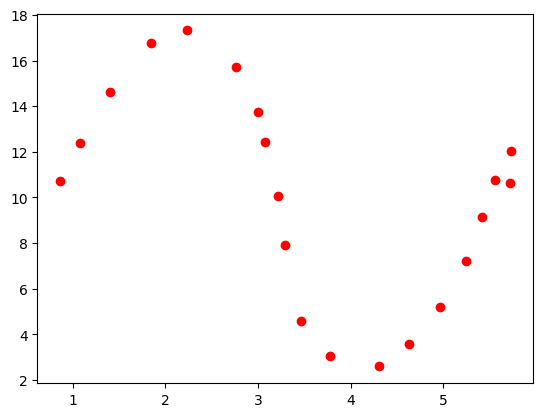

In [5]:
%matplotlib inline
plt.scatter(df.x, df.y, color='red')
plt.show()

> **Zadanie** Napisz funkcję, która utworzy nam macierz $X$. Macierz $X$ powinna składać się z wektora jednostkowego oraz wektorów zawierających poszczególne potęgi zebranych argumentów (opis we wprowadzeniu). Funkcja ta może tworzyć macierz wykorzystując jako parametr wejściowy stopień wielomianu, którym będziemy chcieli dokonywać aproksymacji.

In [6]:
def macierz_X(x, stopien):
    X = np.ones((len(x), 1))
    for i in range(1, stopien + 1):
        X = np.hstack((X, x.reshape(-1, 1) ** i))
    return X

x = np.array([1, 2, 3, 4])
X = macierz_X(x, 3)
print(X)

[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]


> **Zadanie** Przy pomocy funkcji pakietu _numpy_ wyliczającej pseudoinwersję _np.linalg.pinv()_ oraz mnożenia macierzy _np.dot()_ wylicz parametry modelu dla zbioru uczącego.

In [7]:
X = macierz_X(df.x.values, 3)

y = df.y.values.reshape(-1, 1)

w = np.linalg.pinv(X) @ y 

print("Parametry modelu (wektor w):")
print(w)

Parametry modelu (wektor w):
[[-12.03993382]
 [ 36.42883823]
 [-13.81594484]
 [  1.43440655]]


> **Zadanie** 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów stopnia 1, 2, 3, 4 i 5.
2. Wyświetl wykres średniokwadratowego błędu dopasowania krzywej do punktów danych, w funkcji złożoności modelu (stopnia wielomianu). Czym się ta funkcja charakteryzuje ?


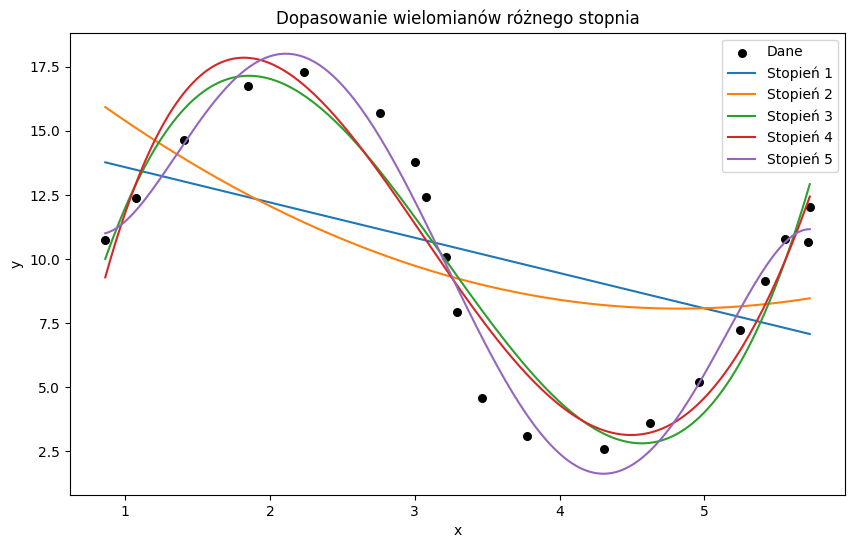

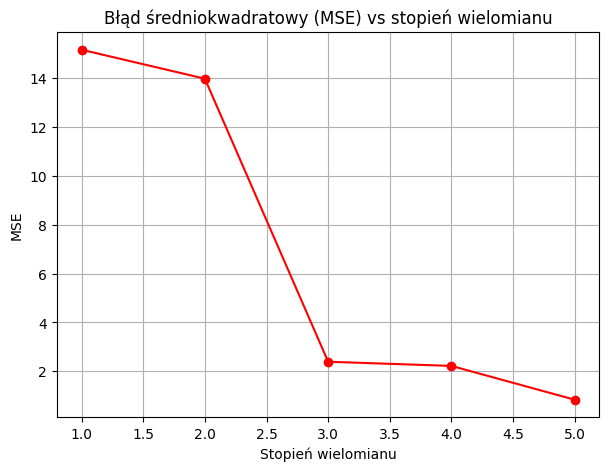

In [8]:
x = df.x.values
y = df.y.values.reshape(-1, 1)

stopnie = [1, 2, 3, 4, 5]
mse_list = []

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', s=30, label='Dane')

for deg in stopnie:
    X = macierz_X(x, deg)
    w = np.linalg.pinv(X) @ y

    x_lin = np.linspace(min(x), max(x), 200)
    X_lin = macierz_X(x_lin, deg)
    y_pred = X_lin @ w

    mse = np.mean((X @ w - y) ** 2)
    mse_list.append(mse)

    plt.plot(x_lin, y_pred, label=f'Stopień {deg}')

plt.title("Dopasowanie wielomianów różnego stopnia")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(stopnie, mse_list, 'o-', color='red')
plt.title("Błąd średniokwadratowy (MSE) vs stopień wielomianu")
plt.xlabel("Stopień wielomianu")
plt.ylabel("MSE")
plt.grid(True)
plt.show()


W analizie dopasowania wielomianów widzimy, że modele niskiego stopnia (1 i 2) są zbyt proste (niedopasowanie), co skutkuje bardzo wysokim błędem MSE. Przejście do Stopnia 3 powoduje gwałtowny spadek błędu i najlepsze wizualne dopasowanie, ponieważ model skutecznie oddaje ogólny, nieliniowy kształt danych. Dalsze zwiększanie złożoności (Stopień 4 i 5) tylko minimalnie obniża błąd na danych treningowych, jednocześnie prowadząc do nadmiernego dopasowania (przeuczenia), gdzie model zaczyna dopasowywać się do szumu zamiast do faktycznej zależności. Wnioskuję, że wielomian Stopnia 3 jest optymalnym wyborem, oferując najlepszy kompromis.

> **Zadanie** Zajdź funkcię wbudowaną pakietu `numpy`, która zwraca wartości współczynników wielomianu dla zadanych punktów (czyli realizuje to co powyżej udało się zrobić "ręcznie").

Współczynniki wielomianu stopnia 3:
[  1.43440655 -13.81594484  36.42883823 -12.03993382]


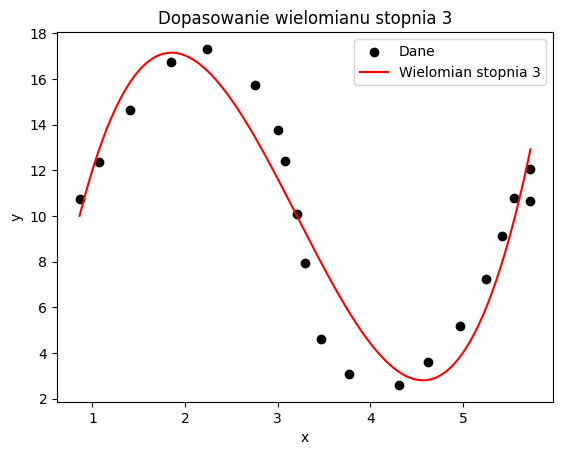

In [9]:
x = df.x.values
y = df.y.values

stopien = 3

wspolczynniki = np.polyfit(x, y, stopien)
print(f"Współczynniki wielomianu stopnia {stopien}:")
print(wspolczynniki)

p = np.poly1d(wspolczynniki)

x_lin = np.linspace(min(x), max(x), 200)

plt.scatter(x, y, color='black', label='Dane')
plt.plot(x_lin, p(x_lin), color='red', label=f'Wielomian stopnia {stopien}')
plt.title(f'Dopasowanie wielomianu stopnia {stopien}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


> **Zadanie** Podziel zbiór na uczacy i testowy, a następnie powtórz wcześniejszy eksperyment z uwzględnieniem tego podziału. W szczególności: 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów kilku wybranych stopni wyznaczonych dla zbioru uczącego.
2. Wyświetl wykres błędu uczenia (tj. dopasowania punktów zbioru uczącego) i generalizacji (tj. dopasowania punktów zbioru testowego) w funkcji złożoności modelu (stopnia wielomianu).
3. Wybierz stopień wielomianu, który najlepiej opisuje Twoje punkty danych z uwzględnieniem podziału na zbiór uczący i testowy. Co należy uwzględnić dokonując takiego wyboru ?

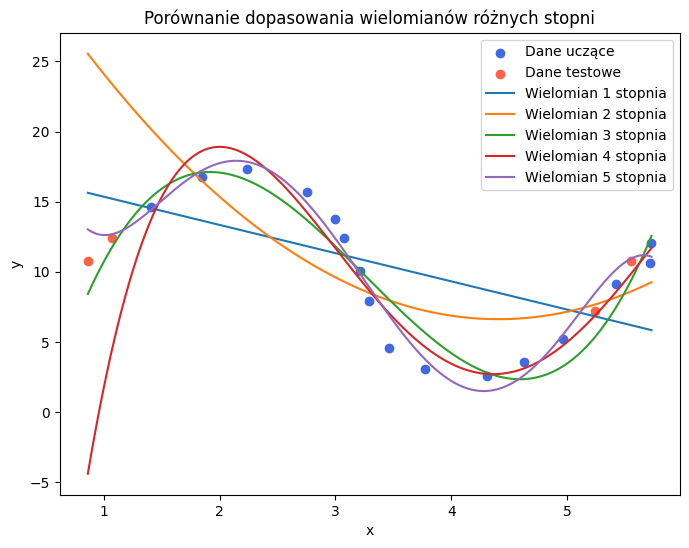

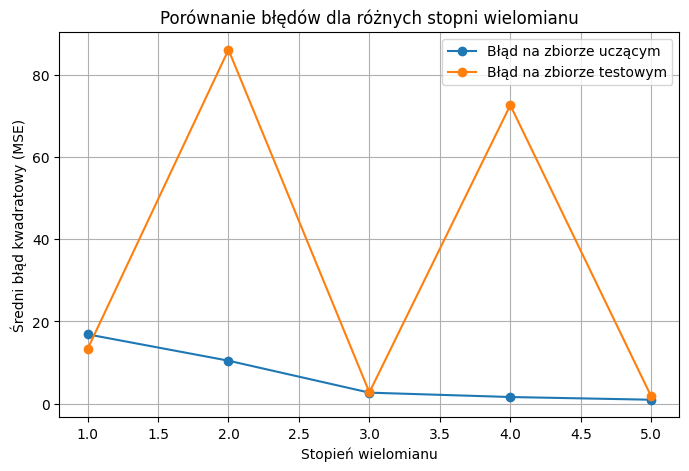

Błędy MSE dla poszczególnych stopni:
Stopień 1: MSE uczący = 16.8622, MSE testowy = 13.2742
Stopień 2: MSE uczący = 10.4487, MSE testowy = 86.0870
Stopień 3: MSE uczący = 2.6757, MSE testowy = 2.7502
Stopień 4: MSE uczący = 1.6141, MSE testowy = 72.5940
Stopień 5: MSE uczący = 0.9553, MSE testowy = 1.7557


In [14]:
X = df.x.values
Y = df.y.values

X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size=0.2, random_state=42)

stopnie_poly = [1, 2, 3, 4, 5]

mse_train = []
mse_test = []

plt.figure(figsize=(8, 6))
plt.scatter(X_tr, Y_tr, color='royalblue', label='Dane uczące')
plt.scatter(X_te, Y_te, color='tomato', label='Dane testowe')

x_line = np.linspace(min(X), max(X), 300)

for s in stopnie_poly:
    wsp = np.polyfit(X_tr, Y_tr, s)
    model = np.poly1d(wsp)

    y_pred_train = model(X_tr)
    y_pred_test = model(X_te)

    mse_train.append(mean_squared_error(Y_tr, y_pred_train))
    mse_test.append(mean_squared_error(Y_te, y_pred_test))

    plt.plot(x_line, model(x_line), label=f'Wielomian {s} stopnia')

plt.title("Porównanie dopasowania wielomianów różnych stopni")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(stopnie_poly, mse_train, 'o-', label='Błąd na zbiorze uczącym')
plt.plot(stopnie_poly, mse_test, 'o-', label='Błąd na zbiorze testowym')
plt.title("Porównanie błędów dla różnych stopni wielomianu")
plt.xlabel("Stopień wielomianu")
plt.ylabel("Średni błąd kwadratowy (MSE)")
plt.legend()
plt.grid(True)
plt.show()

print("Błędy MSE dla poszczególnych stopni:")
for s, tr, te in zip(stopnie_poly, mse_train, mse_test):
    print(f"Stopień {s}: MSE uczący = {tr:.4f}, MSE testowy = {te:.4f}")

Na wykresie widać, że wielomian 1. stopnia nie oddaje dobrze zależności między zmiennymi – model jest zbyt prosty i nie dopasowuje się do trendu danych. Wraz ze wzrostem stopnia wielomianu krzywe coraz lepiej opisują dane uczące, jednak dla wyższych stopni (4 i 5) można zauważyć, że model zaczyna przeuczać się, czyli zbyt dokładnie dopasowuje się do danych uczących kosztem gorszej jakości predykcji na zbiorze testowym.
Z analizy błędów (MSE) wynika, że błąd uczenia systematycznie maleje wraz ze wzrostem stopnia wielomianu, natomiast błąd testowy osiąga minimum dla wielomianu 3. stopnia, a następnie ponownie rośnie. Oznacza to, że model 3. stopnia najlepiej równoważy dokładność dopasowania i zdolność uogólniania.
Podsumowując, wielomian 3. stopnia najlepiej opisuje zebrane punkty – jest wystarczająco elastyczny, aby uchwycić kształt zależności, ale nie jest na tyle złożony, by dopasowywać się do szumu w danych. Wyższe stopnie prowadzą do przeuczenia, a niższe do niedouczenia.

> **Zadanie** Odpowiedz na następujące pytania sprawdzające:
1. Czy jesteśmy w stanie zminimalizować błąd uczenia do 0, jeśli tak to jaki warunek musi być spełniony?
2. Czy powinniśmy tak dobierać stopień wielomianu aby błąd uczenia był jak najmniejszy?
3. Czy równanie zawsze posiada rozwiązanie przybliżone?
4. Co się dzieje z wielkością parametrów modelu w miarę zwiększania stopnia wielomianu?

1. Czy jesteśmy w stanie zminimalizować błąd uczenia do 0, jeśli tak to jaki warunek musi być spełniony?

Tak, błąd uczenia można zredukować do zera, gdy stopień wielomianu jest wystarczająco wysoki (np. równy liczbie punktów − 1). Oznacza to jednak przeuczenie modelu.

2. Czy powinniśmy tak dobierać stopień wielomianu aby błąd uczenia był jak najmniejszy?

Nie, nie należy minimalizować tylko błędu uczenia – ważniejszy jest kompromis między błędem uczącym a testowym (generalizacja).

3. Czy równanie zawsze posiada rozwiązanie przybliżone?

Tak, zawsze da się znaleźć rozwiązanie przybliżone metodą najmniejszych kwadratów.

4. Co się dzieje z wielkością parametrów modelu w miarę zwiększania stopnia wielomianu?

Wraz ze wzrostem stopnia wielomianu wartości współczynników zwykle rosną i model staje się mniej stabilny.
